# Ensembles, Tuning and CV


Like R, Python uses packages in data mining/machine learning. The 3 mose common ones are Pandas (manipulation), Scikit Learn (machine learning) and Matplotlit (graphics).

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import time
from operator import itemgetter
import os
os.getcwd()

'/Users/mylesgartland/OneDrive - Rockhurst University/Courses/Predictive Models/Pred_Models_git/Week 4/code'

In [5]:
cd '/Users/mylesgartland/OneDrive - Rockhurst University/Courses/Predictive Models/Pred_Models_git/Week 4/'

/Users/mylesgartland/OneDrive - Rockhurst University/Courses/Predictive Models/Pred_Models_git/Week 4


# Read in Data
# Churn Calls Data
This is a Pandas operation.

In [8]:
#import data
df = pd.read_csv("data/Churn_Calls.csv", sep=',')
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no
7,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2,no
8,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
9,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2,no


In [9]:
# See each collum name
print(df.columns)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


In [10]:
df.shape

(5000, 20)

#Target
In this step I took the target variable and moved it to the first collum. I aslo made a reference to it called targetName. This just helps me with some below steps.

In [11]:
# designate target variable name
targetName = 'churn'
# move target variable into first column
targetSeries = df[targetName]
del df[targetName]
df.insert(0, targetName, targetSeries)
expected=targetName
df.head(10)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0
5,no,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1
6,no,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1
7,no,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2
8,no,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2
9,no,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2


#EDA
Just a touch of EDA. This is the distribution of the target. As you can see, the datset is imbalanced and the target class of interest "yes" is in the minority (a common occurance in classification).

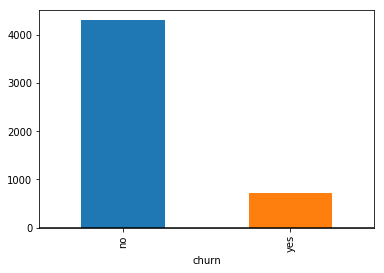

In [12]:
gb = df.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

# Preprocessing
The below two steps are for preprocessing. The first cell changes the yes/no of the target to numeric. I needed to do this as some models require the target to be numeric. The second cell takes all the category features and creates dummies with them. This is stock code I have used for long time (and I did not write it). It is nice because it will take any dataframe of any size and handle categorial features. I do not have to change a single line in it. It can be used generically on bascially any dataframe. Saves a lot of time of coding each feature.

In [13]:
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['churn'] = le_dep.fit_transform(df['churn'])

In [14]:
# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

# After Tranformation

In [15]:
print(df.shape)
df.head()

(5000, 74)


,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,175.2,74,29.78,151.7,79,12.89,230.5,...,0,0,0,1,0,0,1,0,1,0
1,0,36,30,146.3,128,24.87,162.5,80,13.81,129.3,...,0,0,0,1,0,0,1,0,0,1
2,1,36,19,171.9,96,29.22,198.4,111,16.86,321.7,...,0,0,0,0,1,0,0,1,0,1
3,0,41,0,159.3,66,27.08,125.9,75,10.70,261.9,...,0,0,0,0,1,0,1,0,1,0
4,0,42,0,171.0,129,29.07,183.9,96,15.63,130.2,...,0,0,0,0,1,0,1,0,1,0


# Test/Train
I split the data into a 60/40 train test. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". I used a biggest test when I have an imbalanced set. 

In [16]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.40, random_state=0)

Just a view of the size of each test/train set.
Note there are now 73 features, and the test set is imbalanced (14.6%)

In [17]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes", target_test.mean())
#data.groupby(['col1', 'col2'])

(2000, 73)
(3000, 73)
(2000,)
(3000,)
Percent of Target that is Yes 0.146


#Models
All the models are done in Sci-Kit Learn.

In [21]:
from sklearn.linear_model import LogisticRegression
clf_Log=LogisticRegression()
print(clf_Log)
clf_Log = clf_Log.fit(features_train, target_train)
#DT test model
target_predicted_Log = clf_Log.predict(features_test)
print("Logistic Accuracy Score", accuracy_score(target_test, target_predicted_Log))
# print classification report
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_Log, target_names=target_names))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic Accuracy Score 0.861
             precision    recall  f1-score   support

  Fail = no       0.88      0.97      0.92      1708
 Fail = yes       0.56      0.23      0.32       292

avg / total       0.83      0.86      0.83      2000



# Decision Tree
I created a decision tree from the data. The accurancy of the model was 921%, while the test data classified at 92%. However notice that the "yes" class (the class I am interested in) only properly classified at 74% (specificity) and .71 (recall). That is so-so. Again, not uncommon with imbalanced data. 

In [19]:
#Decision Tree train model
from sklearn import tree 
clf = tree.DecisionTreeClassifier()
print(clf)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
# print classification report
target_names = ["Fail = no", "Fail = yes"]
print(classification_report(target_test, target_predicted_dt, target_names=target_names))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DT Accuracy Score 0.9245
             precision    recall  f1-score   support

  Fail = no       0.95      0.96      0.96      1708
 Fail = yes       0.75      0.73      0.74       292

avg / total       0.92      0.92      0.92      2000



# Cross Validation of Decision Tree
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .92, which is quite close to the orginal model. I am not going to worry about over fitting.

In [22]:
#verify DT with Cross Validation
scores = cross_val_score(clf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.92026578 0.89700997 0.93355482 0.93355482 0.91694352 0.93979933
 0.9264214  0.92976589 0.92976589 0.92307692]


0.9250158335092612

# Visual of Confusion Matrix for Decision Tree

[[1635   73]
 [  78  214]]


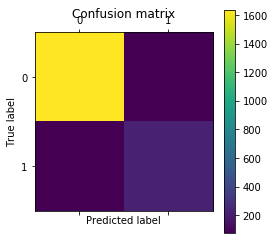

In [23]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_dt)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

#Random Forest
Using the same data, I built a random forest with 500 bootstrapped trees. Notice I parallelized this to 4 cores as big random forest can be computationally expensive. 

My overall results went up by 3% over the decision tree. Also, my minory target precision, but the recall decresed.  

In [25]:
# train random forest model
#paralleized to 4 cores 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1,oob_score=True, class_weight="balanced")
print(rf)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("Random Forfest Accuracy", accuracy_score(target_test, target_predicted_rf))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_rf))


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Random Forfest Accuracy 0.942
             precision    recall  f1-score   support

 Churn = no       0.94      0.99      0.97      1708
Churn = yes       0.95      0.63      0.76       292

avg / total       0.94      0.94      0.94      2000

[[1699    9]
 [ 107  185]]


#Cross Validation of Random Forest
I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. The mean is .949, which is quite close to the orginal model. I am not going to worry about over fitting.

In [26]:
#verify RF with cross validation
scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [0.94352159 0.9269103  0.93687708 0.96677741 0.93687708 0.94314381
 0.94648829 0.93645485 0.94314381 0.93311037]


0.941330459227325

#Visual of Confusion Matrix for Random Forest

[[1700    8]
 [  90  202]]


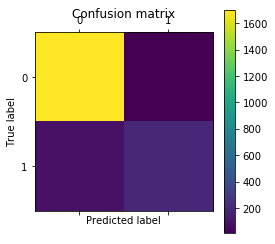

In [19]:
# display confusion matrix
cm = confusion_matrix(target_test, target_predicted_rf)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

# Hyperparameter Tuning
You can tune any argument in these models. I did a grid search only on max_features (mtry in R). I parallelized the job to 4 cores for speed. You can see that max_features (mtry) of 5 had the best results. But frankly was very little difference from the other parameter results.

In [27]:
# use a full grid over all parameters
param_grid = {"max_features": [2, 3, 4, 5]}
start_time = time.clock()




# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train, target_train)

print("Time to run", time.clock() - start_time, "seconds")
print(grid_search.cv_results_)


Time to run 2.7899879999999992 seconds
{'mean_fit_time': array([2.21927627, 2.35528859, 2.34866667, 1.56024599]), 'std_fit_time': array([0.0446339 , 0.01146653, 0.51189276, 0.07616279]), 'mean_score_time': array([0.22661114, 0.31093629, 0.20847448, 0.20404474]), 'std_score_time': array([0.00918721, 0.00306949, 0.00712953, 0.00212643]), 'param_max_features': masked_array(data=[2, 3, 4, 5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 2}, {'max_features': 3}, {'max_features': 4}, {'max_features': 5}], 'split0_test_score': array([0.87812188, 0.89210789, 0.8981019 , 0.90609391]), 'split1_test_score': array([0.887, 0.902, 0.911, 0.92 ]), 'split2_test_score': array([0.88888889, 0.8978979 , 0.90590591, 0.91291291]), 'mean_test_score': array([0.88466667, 0.89733333, 0.905     , 0.913     ]), 'std_test_score': array([0.00469506, 0.00405909, 0.0053057 , 0.00567889]), 'rank_test_score': array([4, 3, 2, 1], dtype=int3

#KNN
I performed KNN on K=3 and K=5. For both K's the accurancy was 85% and 87% respectively and I still have problems with the minority class. KNN and Decision Tree perform about the same. I find this to be true frequently, which is why I use them as my base comparative models. 

# More Details
Now that we know our random forest was the best model of the three I ran, I will gather some other information. Below is a non-ordered list of feature importance. I only showed 20 for purposes of space.

# Show importance of each feature in Random Forest


In [28]:
print("Features sorted by their score:")
print("Higher the more important")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),df.columns[1:20]), 
             reverse=True))


Features sorted by their score:
Higher the more important
[(0.1238, 'number_customer_service_calls'), (0.1221, 'total_day_charge'), (0.1186, 'total_day_minutes'), (0.0502, 'total_eve_minutes'), (0.0486, 'total_eve_charge'), (0.0398, 'total_night_minutes'), (0.0382, 'total_night_charge'), (0.0373, 'total_intl_minutes'), (0.0356, 'total_intl_charge'), (0.0353, 'account_length'), (0.0321, 'total_intl_calls'), (0.0319, 'total_night_calls'), (0.0316, 'total_eve_calls'), (0.0311, 'total_day_calls'), (0.0185, 'number_vmail_messages'), (0.0017, 'state_AZ'), (0.0011, 'state_AR'), (0.0008, 'state_AL'), (0.0007, 'state_AK')]


# ROC curve for Random Forest
Finally a ROC curve that shows the lift I get from the Random Forest model. 

ROC AUC: 0.919


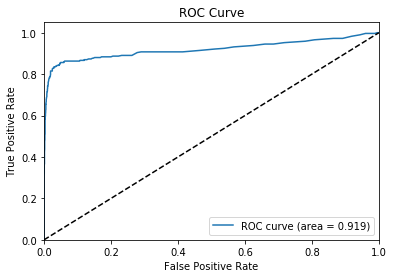

In [29]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
    
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest does the best, but I still am not getting the accurancy on my target class of interest. I have a few tricks I can do to work on this, but that is for another day/class.

# Other Ensembles

In [48]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(n_estimators=100, random_state=0)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,predicted_bag))
print(classification_report(expected, predicted_bag,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bag))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
         verbose=0, warm_start=False)
Bagging Accuracy 0.9515
             precision    recall  f1-score   support

         No       0.96      0.99      0.97      1708
        Yes       0.91      0.74      0.82       292

avg / total       0.95      0.95      0.95      2000

[[1686   22]
 [  75  217]]


# Extra Trees

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(max_depth=3,
                         n_estimators=10,class_weight='balanced')
xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
expected = target_test
print("Extra Trees", accuracy_score(expected,predicted_xdt))
print(classification_report(expected, predicted_xdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_xdt))

Extra Trees 0.848
             precision    recall  f1-score   support

         No       0.95      0.87      0.91      1708
        Yes       0.49      0.74      0.59       292

avg / total       0.88      0.85      0.86      2000

[[1479  229]
 [  75  217]]


# AdaBoost of a Decision Tree

In [30]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))


Adaboost Accuracy 0.9475
             precision    recall  f1-score   support

         No       0.96      0.98      0.97      1708
        Yes       0.88      0.74      0.80       292

avg / total       0.95      0.95      0.95      2000

[[1680   28]
 [  77  215]]


# Gradient Boost Classification

In [31]:

from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.7, max_depth=1, random_state=0)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))


Gradient Boost Accuracy 0.862
             precision    recall  f1-score   support

         No       0.92      0.92      0.92      1708
        Yes       0.53      0.53      0.53       292

avg / total       0.86      0.86      0.86      2000

[[1569  139]
 [ 137  155]]


# Stacking

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Three Models RF, NB, BDT
clf1 = RandomForestClassifier(random_state=1)
clf2 = LogisticRegression()
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
eclf2 = VotingClassifier(estimators=[('rf', clf1), ('gnb', clf2), ('bdt', bdt)], voting='hard')
for MV, label in zip([clf1, clf2, bdt, eclf2], ['Random Forest', 'Logistic', 'AdaBoost Decision Tree', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.93 (+/- 0.01) [Random Forest]
Accuracy: 0.87 (+/- 0.01) [Logistic]
Accuracy: 0.94 (+/- 0.00) [AdaBoost Decision Tree]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy: 0.93 (+/- 0.01) [Ensemble]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
